In [2]:
import mne 
import numpy as np
import os

In [2]:
raw_data_path = r'D:\Priming_name\Biosemi\2025-10-07-pilot02-block04.bdf'
raw = mne.io.read_raw_bdf(raw_data_path, preload=True)
raw.info  # To inspect metadata

Extracting EDF parameters from D:\Priming_name\Biosemi\2025-10-07-pilot02-block04.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 360447  =      0.000 ...   703.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 72 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2025-10-07 16:56:38 UTC
 nchan: 73
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: >
>

In [3]:
raw.set_channel_types({
    'EXG1': 'eeg',
    'EXG2': 'eeg',
    'EXG3': 'eog',
    'EXG4': 'eog',
    'EXG5': 'eog',
    'EXG6': 'eog',
    'EXG7': 'ecg',
    'EXG8': 'ecg',
})

<RawEDF | 2025-10-07-pilot02-block04.bdf, 73 x 360448 (704.0 s), ~200.8 MiB, data loaded>

In [8]:
montage = mne.channels.make_standard_montage('biosemi64')  # for Biosemi
raw.set_montage(montage, on_missing='ignore')

<RawEDF | 2025-10-07-pilot02-block04.bdf, 73 x 360448 (704.0 s), ~200.8 MiB, data loaded>

In [9]:
filt_raw = raw.set_eeg_reference(ref_channels=["EXG1", "EXG2"])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


In [10]:
filt_raw.filter(l_freq=1., h_freq=40.)
filt_raw.notch_filter(freqs=50)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edg

<RawEDF | 2025-10-07-pilot02-block04.bdf, 73 x 360448 (704.0 s), ~200.8 MiB, data loaded>

In [ ]:
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs
ica = ICA(n_components=64,method='picard', max_iter="auto", random_state=97)
# filt_raw.drop_channels(["EXG1", "EXG2"])
ica.fit(filt_raw)


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components
Fitting ICA took 117.1s.


Method,picard
Fit parameters,max_iter=500
Fit,247 iterations on raw data (360448 samples)
ICA components,64
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


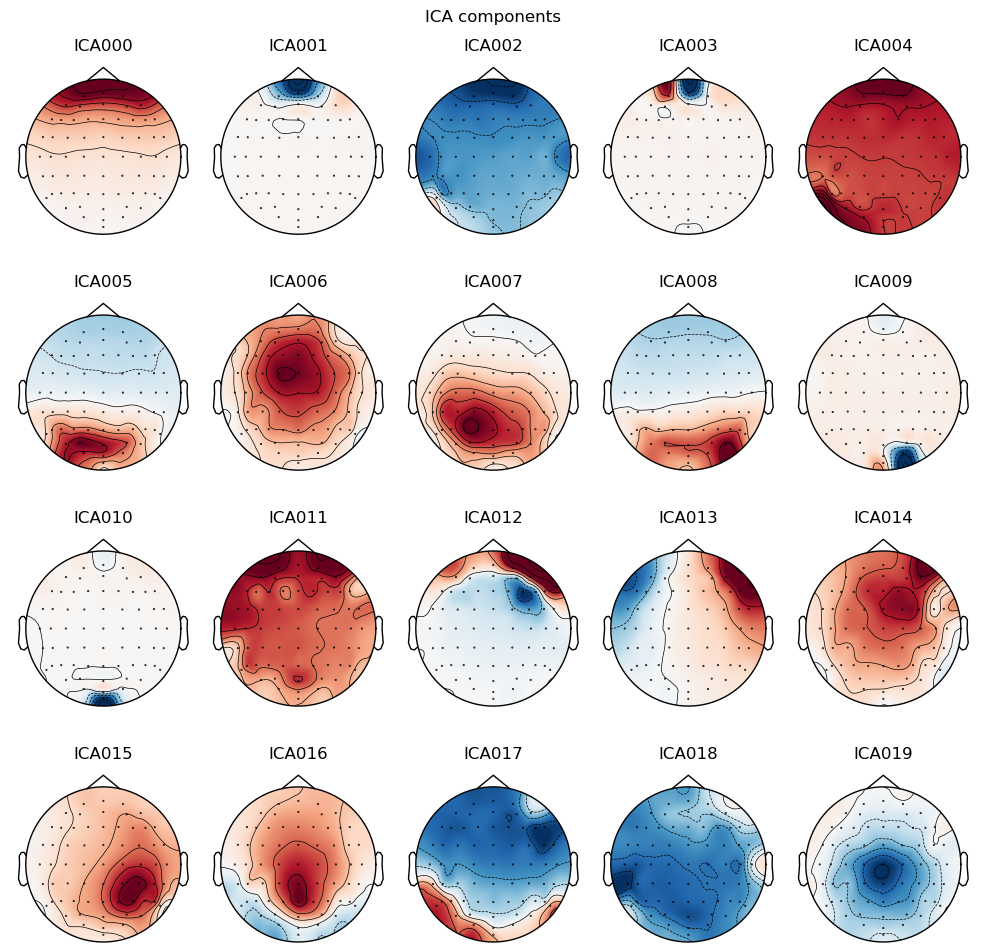

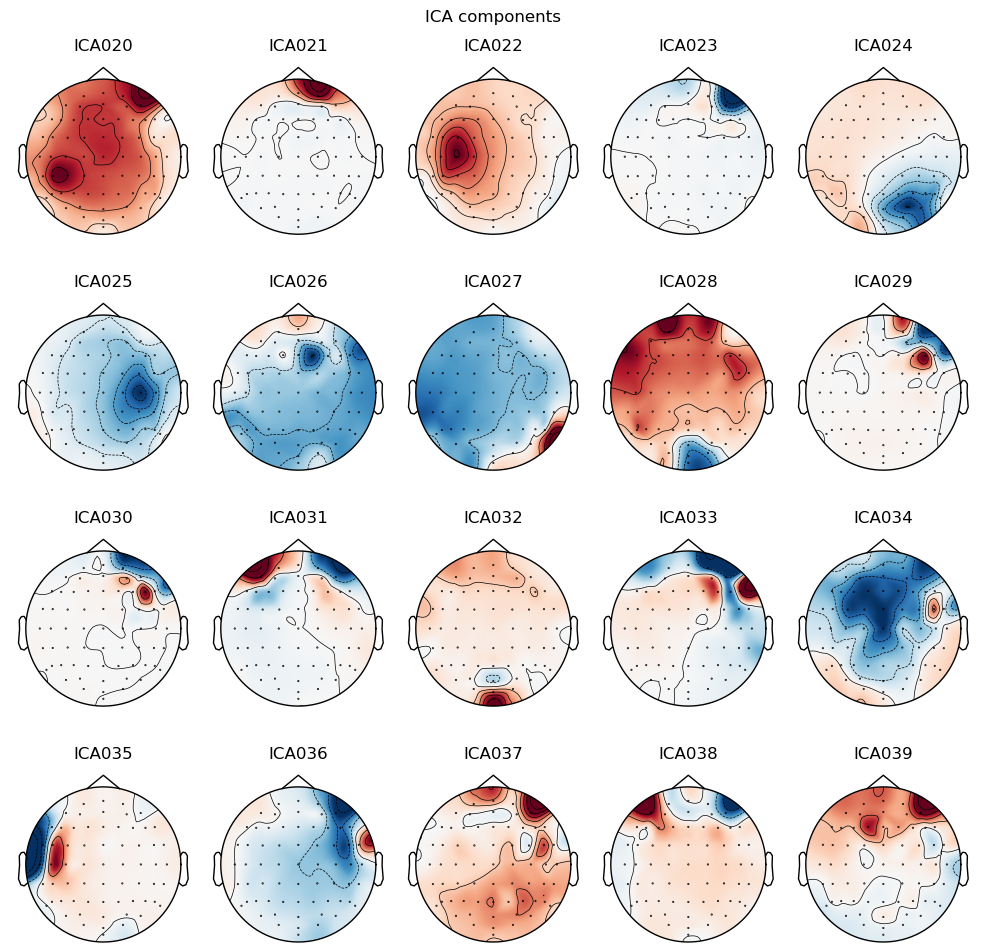

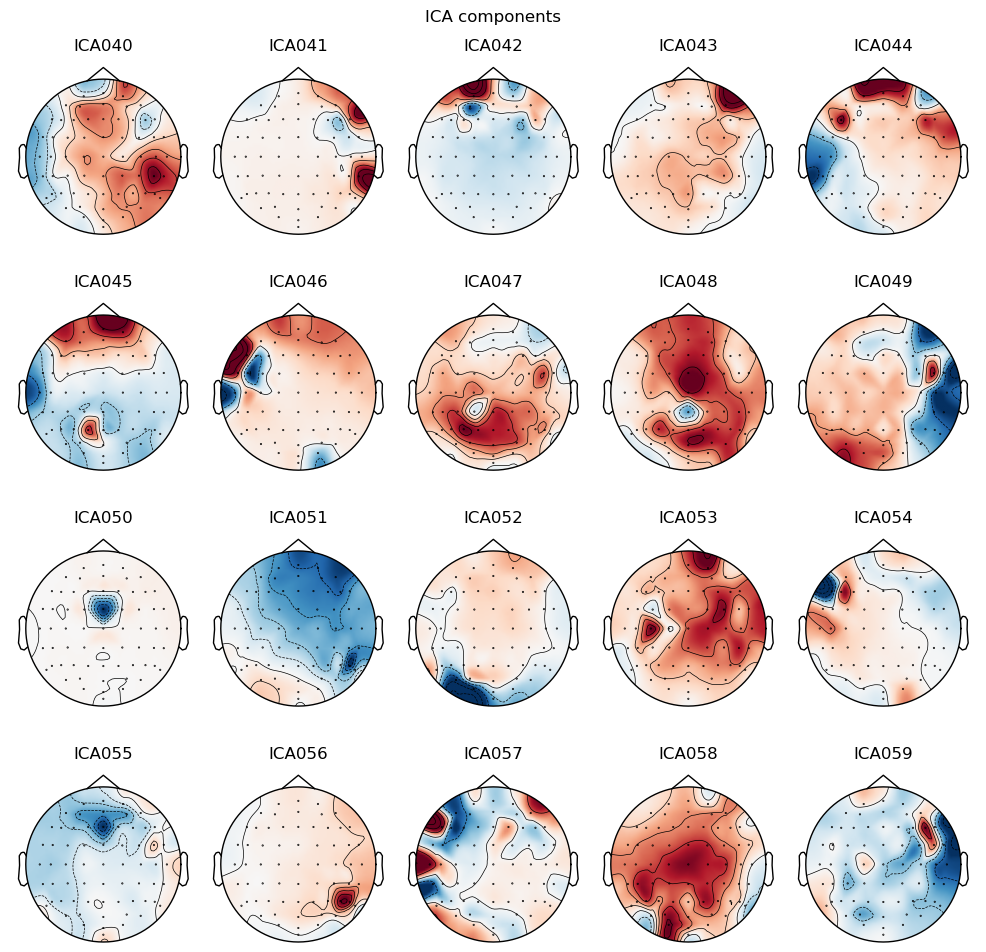

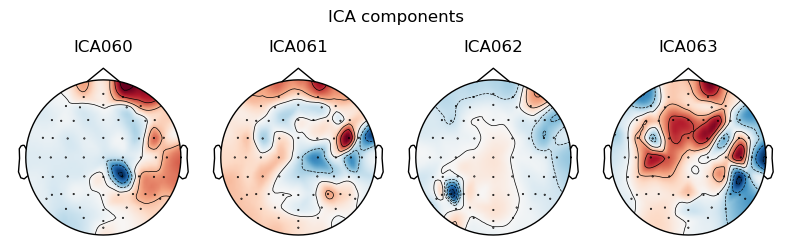

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 780x260.5 with 4 Axes>]

In [20]:
ica.plot_components()

In [21]:
ica.exclude = [0, 1, 2, 3] 

In [23]:
folder = os.path.dirname(raw_data_path)
basename = os.path.splitext(os.path.basename(raw_data_path))[0]

ica_path = os.path.join(folder, f'{basename}-ica.fif')
ica.save(ica_path, overwrite=True)

Overwriting existing file.
Writing ICA solution to D:\Priming_name\Biosemi\2025-10-07-pilot02-block04-ica.fif...
Overwriting existing file.


Method,picard
Fit parameters,max_iter=500
Fit,247 iterations on raw data (360448 samples)
ICA components,64
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,ICA000ICA001ICA002ICA003


In [15]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

Creating RawArray with float64 data, n_channels=21, n_times=371200
    Range : 0 ... 371199 =      0.000 ...   724.998 secs
Ready.


In [18]:
ica.find_bads_eog(filt_raw, ch_name=['EXG3','EXG4','EXG5','EXG6'])
ica.find_bads_ecg(filt_raw, ch_name='EXG7')
ica.apply(filt_raw)

Using EOG channels: EXG3, EXG4, EXG5, EXG6
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5120 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff fre

<RawEDF | 2025-10-07-pilot02-block03.bdf, 73 x 371200 (725.0 s), ~206.8 MiB, data loaded>

In [26]:
events = mne.find_events(filt_raw)
events

Finding events on: Status
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1421 events found on stim channel Status
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  71  72  73  74  87  88  89  90  91  92  93  94  95 103 104 105
 106 107 110 111]


array([[ 25768,      0,     72],
       [ 26042,      0,     19],
       [ 26367,      0,     90],
       ...,
       [365711,     71,     95],
       [365926,      0,     11],
       [366677,      0,     90]], shape=(1421, 3))

In [23]:
unique, counts = np.unique(events[:, 2], return_counts=True)
event_counts = dict(zip(unique, counts))
print(event_counts)

{}


In [3]:
data_path = r'D:\Priming_name\Biosemi\2025-10-07-pilot02-block04-preprocessed.fif'
data = mne.read_epochs(data_path, preload=True)

Reading D:\Priming_name\Biosemi\2025-10-07-pilot02-block04-preprocessed.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available


C:\Users\LSA\AppData\Local\Temp\ipykernel_17956\3010880838.py:2: RuntimeWarning: This filename (D:\Priming_name\Biosemi\2025-10-07-pilot02-block04-preprocessed.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  data = mne.read_epochs(data_path, preload=True)


Not setting metadata
400 matching events found
No baseline correction applied
0 projection items activated


In [4]:
congruent = data['171'].average()
incongruent = data['172'].average()

In [6]:
channels_of_interest = ['Oz', 'POz', 'Pz', 'CPz', 'Cz', 'FCz', 'Fz', 'AFz', 'Fpz']


In [5]:
evokeds_dict = {
    'congruent': congruent,
    'incongruent': incongruent
}

C:\Users\LSA\AppData\Local\Temp\ipykernel_17956\3734384913.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


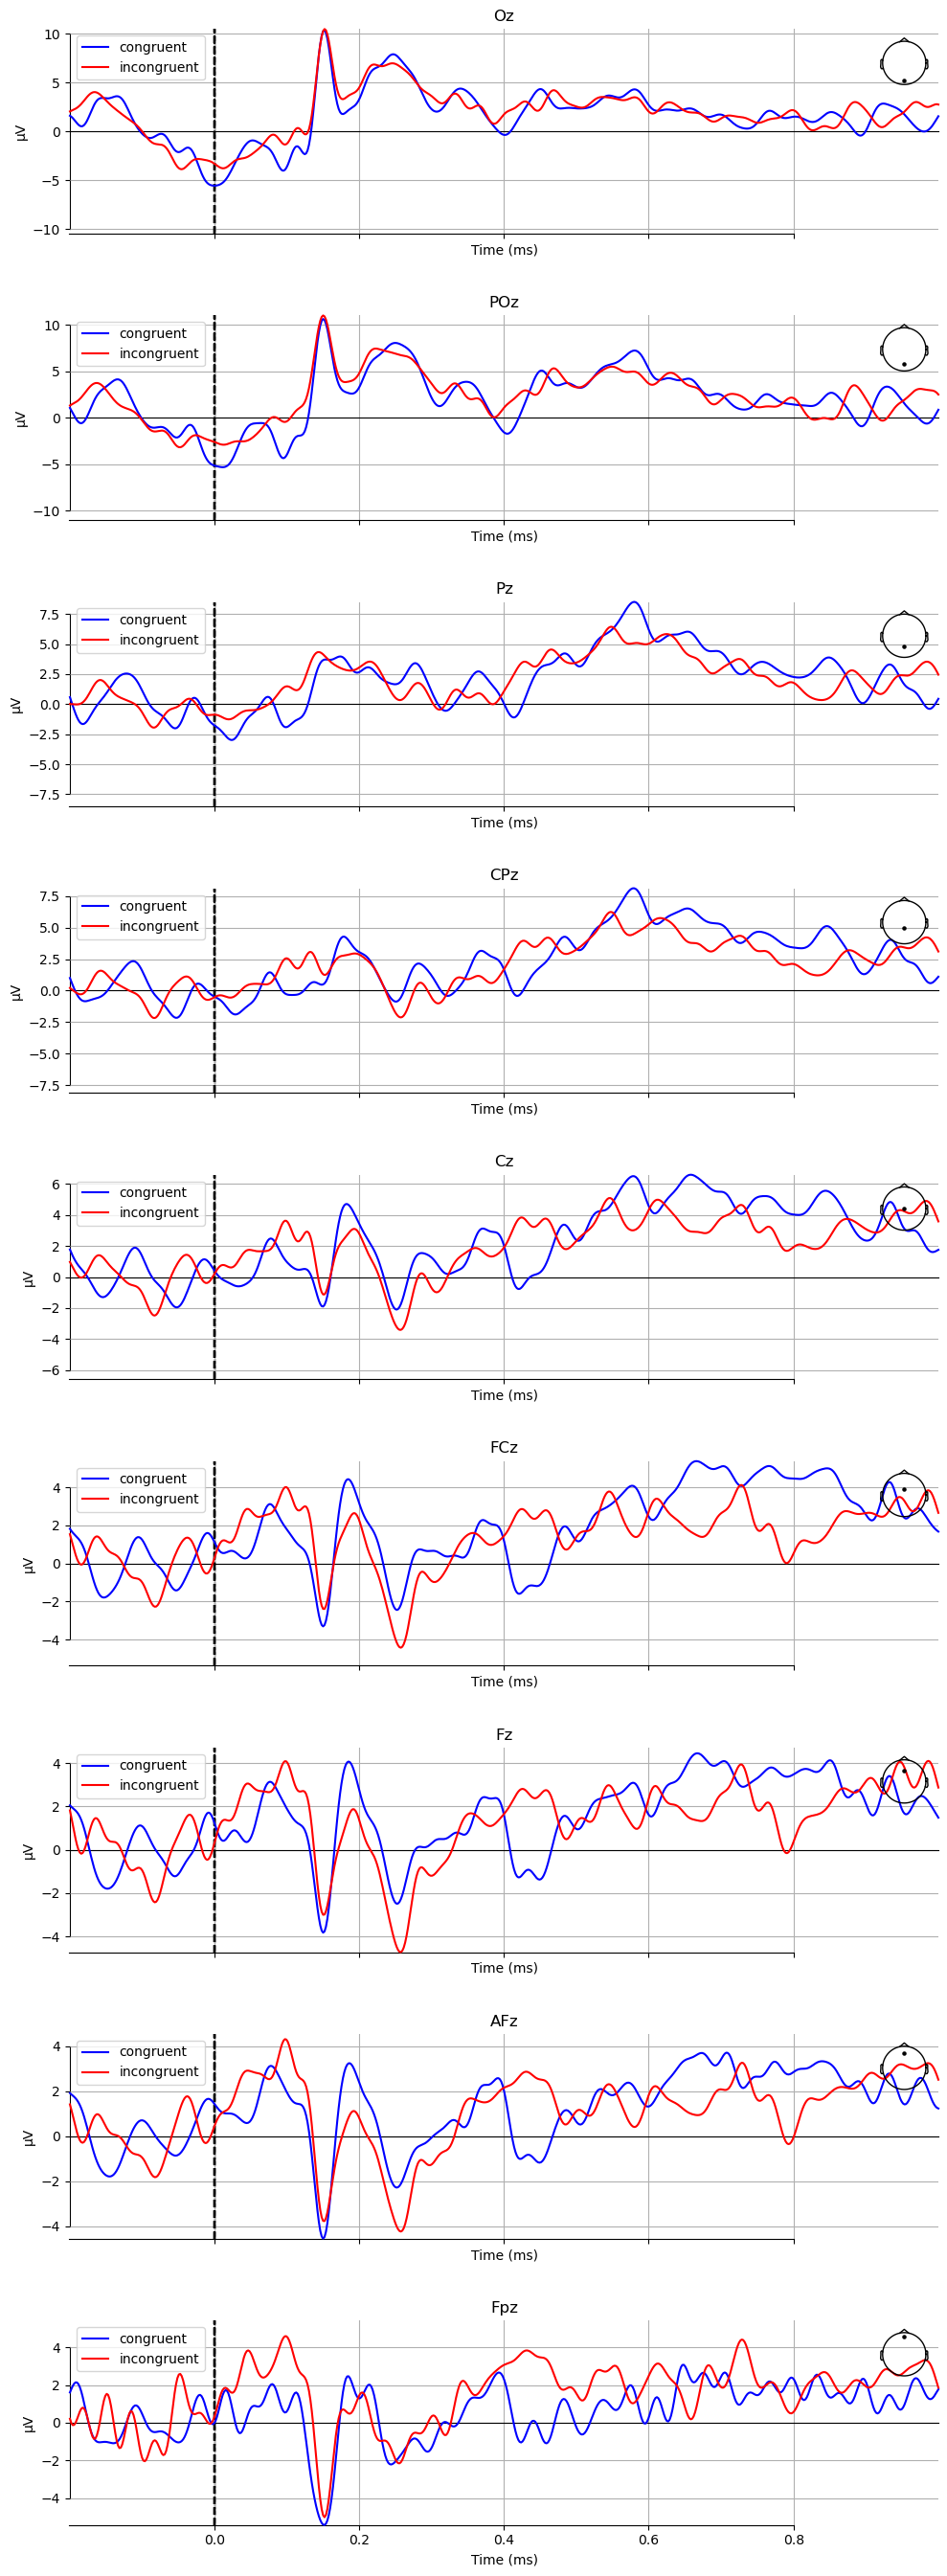

In [17]:
import matplotlib.pyplot as plt

n_channels = len(channels_of_interest)
fig, axes = plt.subplots(n_channels, 1, figsize=(10, 3*n_channels), sharex=True)

for i, ch in enumerate(channels_of_interest):
    mne.viz.plot_compare_evokeds(
        evokeds_dict,
        picks=[ch],
        axes=axes[i],
        colors={'congruent': 'blue', 'incongruent': 'red'},
        show=False
    )
    axes[i].set_title(ch)
        # x-axis label
    axes[i].set_xlim(incongruent.times[0], congruent.times[-1])  # full epoch time
    axes[i].grid(True)

    for ax in axes:
        ax.axvline(0, color='k', linestyle='--')
        ax.set_xlabel('Time (ms)')   


plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()